SADFasf asf asfasf as ASf a

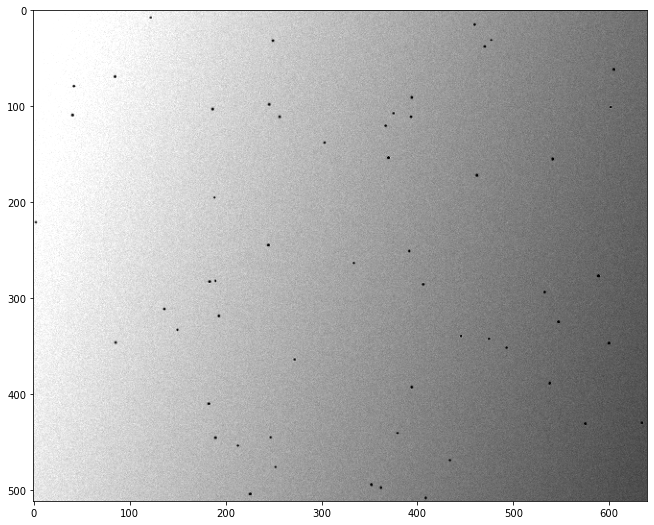

In [1]:
from loader import *
from models import *
from utils import *
from plotting import *
im_size_width, im_size_height, radius = 640, 512, 0.3e-6
plankton = stationary_spherical_plankton(im_size_height, im_size_width, radius, label=1)

gradient_amp = 0.5
microscope = plankton_brightfield(im_size_height, im_size_width, gradient_amp)

no_of_planktons = 50
sample = create_sample(plankton, no_of_planktons)

noise_amp = 2
norm_min, norm_max= -0.2, 1.2
image = create_image(noise_amp, sample, microscope, norm_min, norm_max)

plot_image(image)

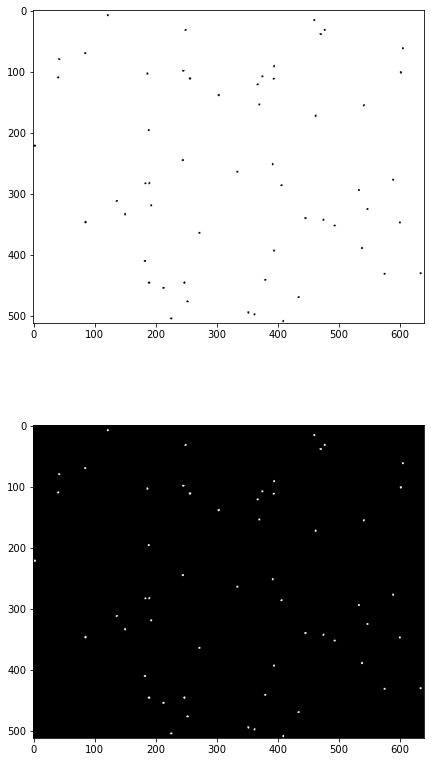

In [2]:
label = get_target_image(image.resolve())
label_function = get_target_image
plot_label(label_function, image)

In [3]:
from deeptrack.generators import ContinuousGenerator
generator = ContinuousGenerator(
    image,
    get_target_image,
    batch_function0,
    batch_size=2,
    min_data_size=4,
    max_data_size=512
    )

In [4]:
no_of_inputs, number_of_outputs = 1, 2
model = generate_unet(im_size_height, im_size_width, no_of_inputs, number_of_outputs)
model = train_model(model, generator, patience=20, epochs=20, steps_per_epoch=2)

Generating 5 / 4 samples before starting training
Epoch 1/20
2/2 [==============================] - 0s 46ms/step - loss: 9.8403e-04
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 8.5945e-04
Epoch 3/20
2/2 [==============================] - 0s 40ms/step - loss: 9.2071e-04
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 8.4239e-04
Epoch 5/20
2/2 [==============================] - 0s 42ms/step - loss: 9.6665e-04
Epoch 6/20
2/2 [==============================] - 0s 40ms/step - loss: 8.9555e-04
Epoch 7/20
2/2 [==============================] - 0s 42ms/step - loss: 9.2137e-04
Epoch 8/20
2/2 [==============================] - 0s 40ms/step - loss: 8.8929e-04
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 7.6214e-04
Epoch 10/20
2/2 [==============================] - 0s 40ms/step - loss: 7.8329e-04
Epoch 11/20
2/2 [==============================] - 0s 45ms/step - loss: 7.4192e-04
Epoch 12/20
2/2 [=============================

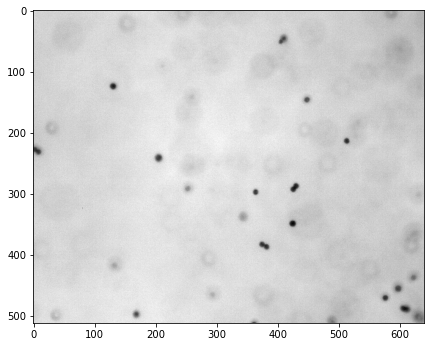

In [5]:
# outputs = ["img", "img", "img", "diff", "diff"]
# output_numbers = [0, 1, 2, [0,1], [1,2]]
folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2'
calculated_mean_image = get_mean_image(folder_path, im_size_width, im_size_height)
im_stack = get_image_stack(outputs=["img"], 
    output_numbers = [0], 
    folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2', 
    frame_im0 = 20, 
    im_size_width = 640, 
    im_size_height = 512)

plot_im_stack(im_stack)

In [6]:
positions = extract_positions(
    no_of_frames = 10, 
    outputs=["img"], 
    output_numbers = [0], 
    folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2', 
    frame_im0 = 20, 
    im_size_width = 640, 
    im_size_height = 512,
    model = model, 
    layer = 1, 
    value_threshold=0.9)


In [7]:
list_of_plankton = assign_positions_to_planktons(positions, max_dist=10, threshold = 10, extrapolate=False)
list_of_plankton = Interpolate_gaps_in_plankton_positions(list_of_plankton=list_of_plankton)
list_of_plankton = Trim_list_from_stationary_planktons(list_of_plankton=list_of_plankton, min_distance=10)

plankton_track, plankton_dont_track = split_plankton(percentage_threshold=0.4, list_of_plankton=list_of_plankton)

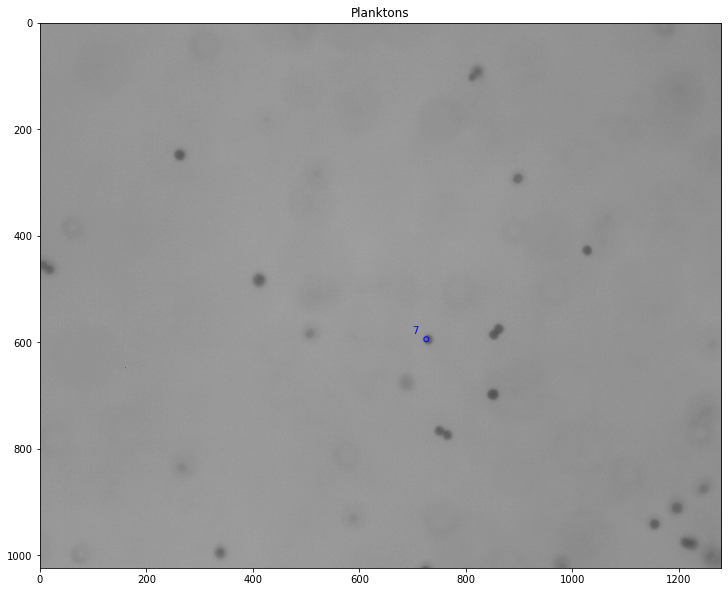

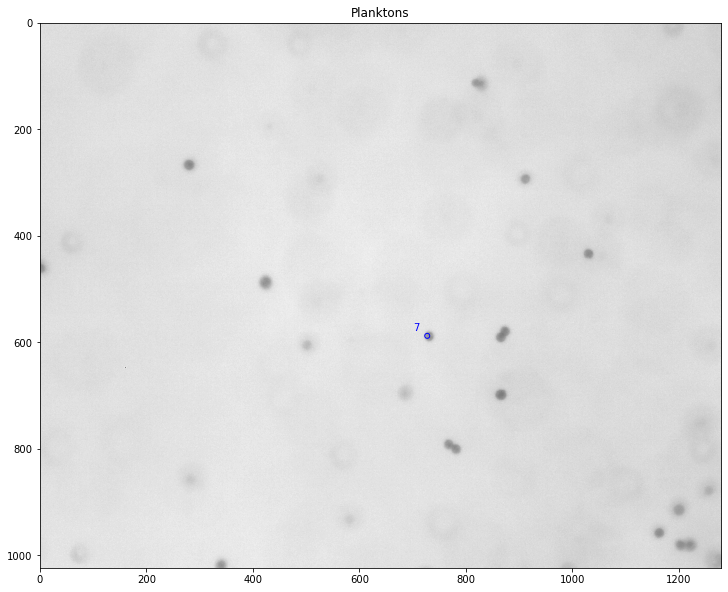

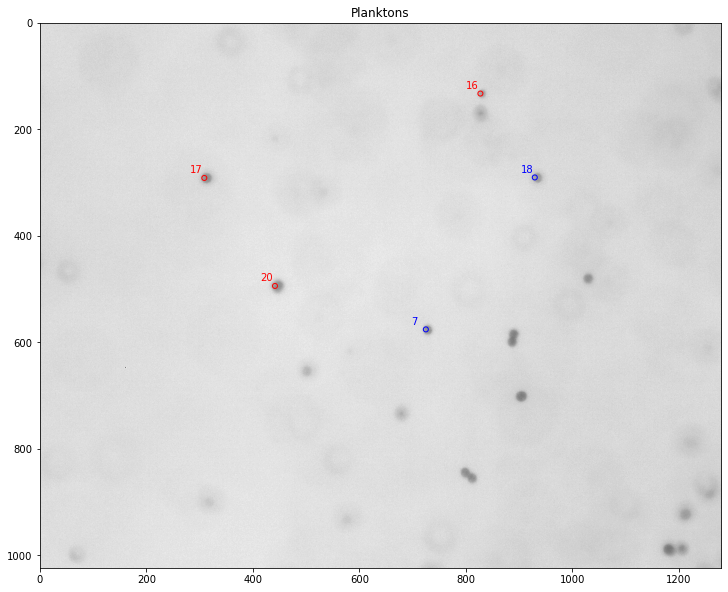

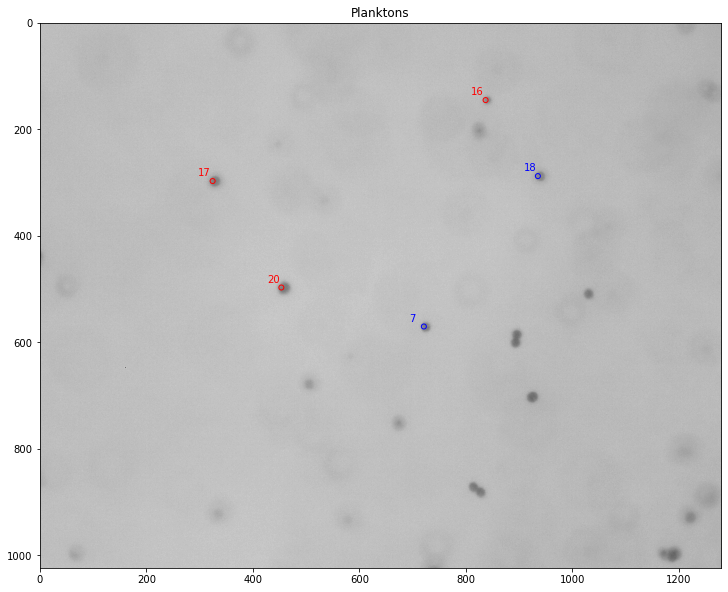

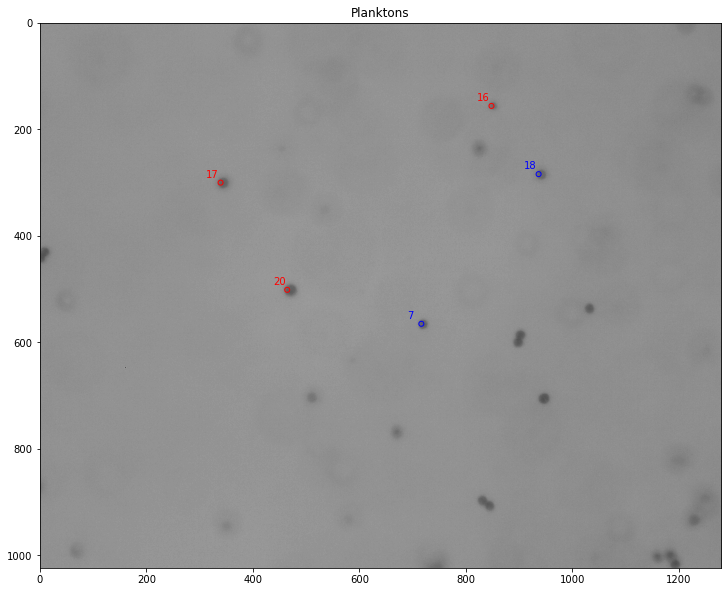

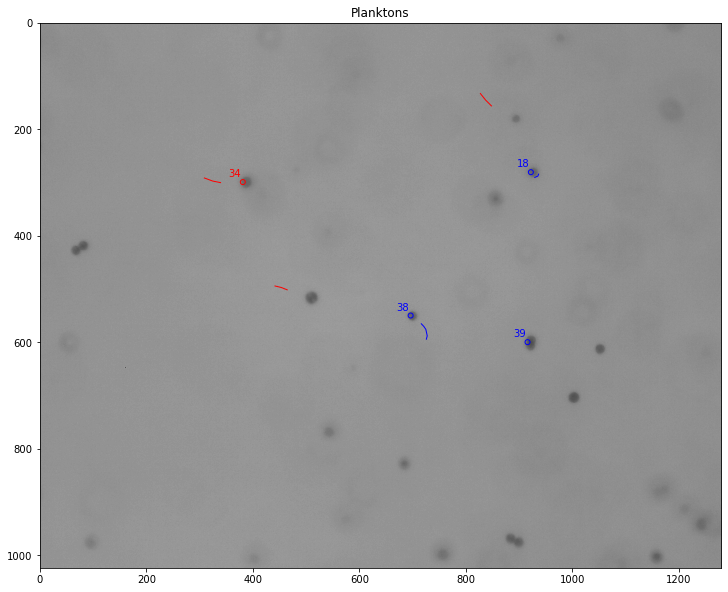

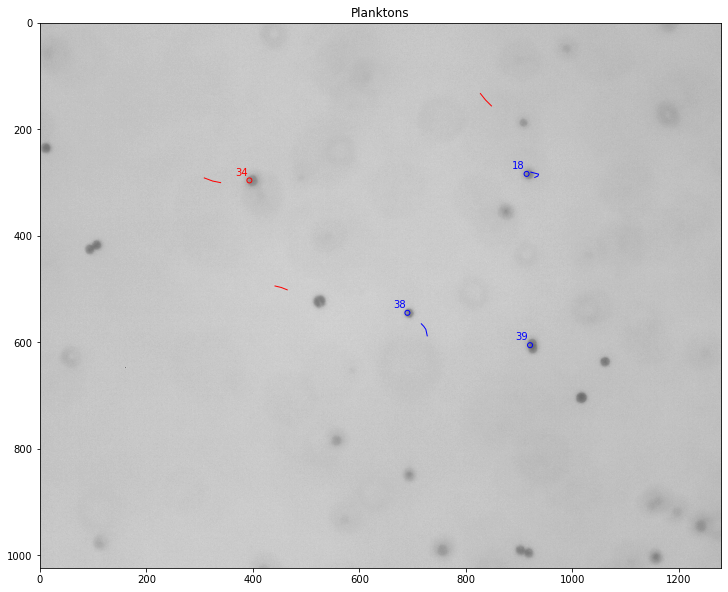

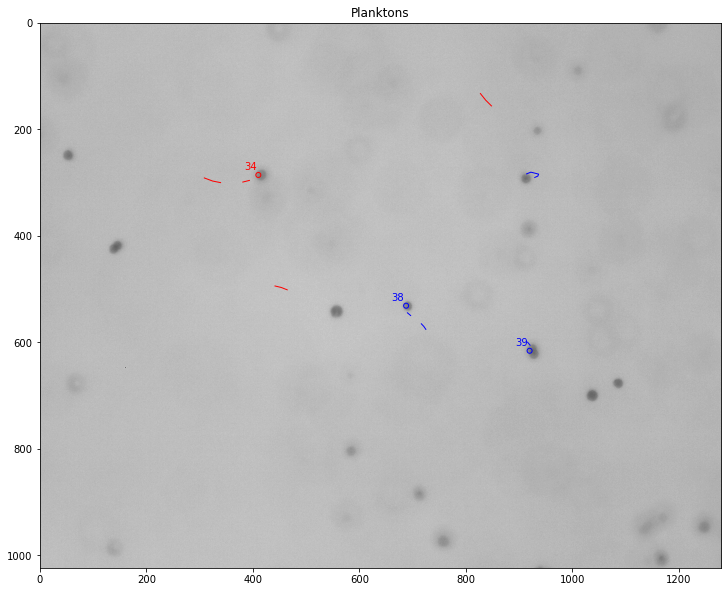

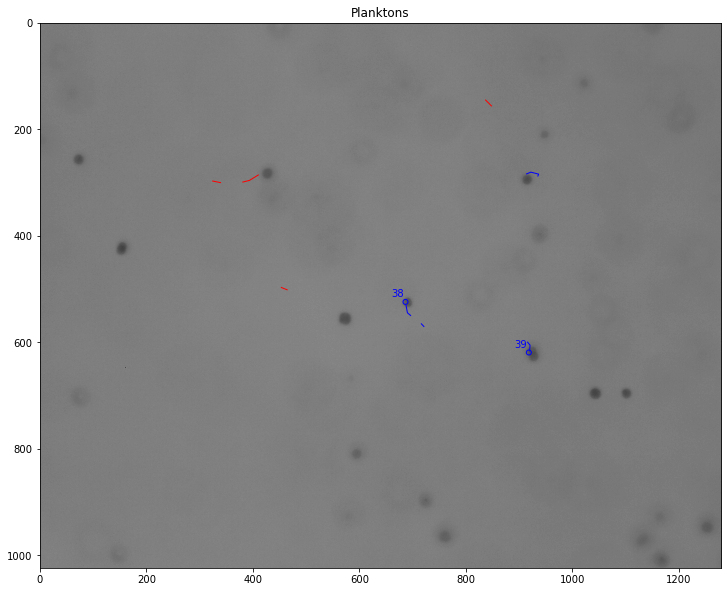

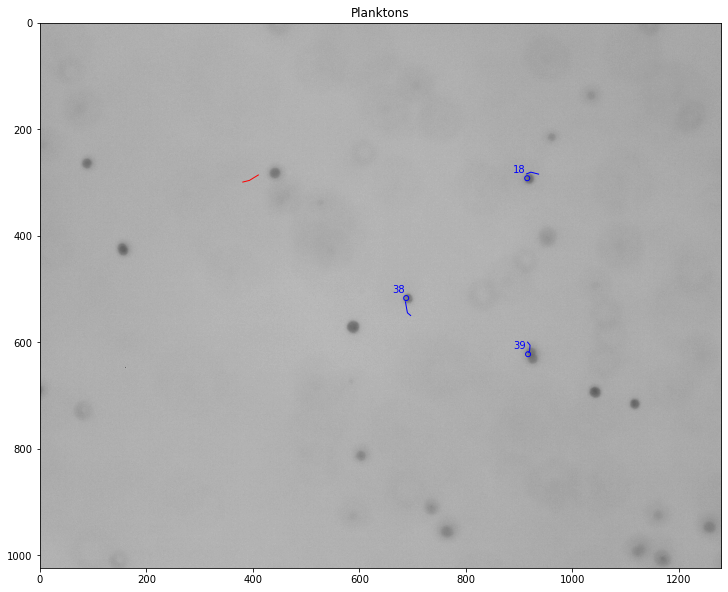

In [13]:
plot_and_save_track(no_of_frames = len(list_of_plankton[list(list_of_plankton.keys())[0]].positions),
                    plankton_track = plankton_track,
                    plankton_dont_track = plankton_dont_track,
                    folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2',
                    frame_im0 = 20,
                    save_images = False,
                    show_plankton_track = True,
                    show_plankton_dont_track = True,
                    show_numbers_track = True,
                    show_numbers_dont_track = True,
                    show_numbers_specific_plankton = False,
                    show_specific_plankton = False,
                    specific_plankton = None,
                    color_plankton_track = 'b',
                    color_plankton_dont_track = 'r',
                    color_specific_plankton = 'w',
                    save_path = None,
                    frame_name = 'track',
                    file_type = '.jpg')
